## Avance 1 - Carga y Transformación de los Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Se cargó el archivo CSV
try:
  df = pd.read_csv('/Users/chrxsmac/Documents/PIDA_M4_Christian_Lara.ipynb/data_latinoamerica.csv', sep=',')

  print("¡Archivo data_latinoamerica.csv cargado exitosamente (completo)!")
  print(f"Dimensiones del DataFrame cargado: {df.shape[0]} filas y {df.shape[1]} columnas.")

  # Muestra las primeras filas para verificar
  display(df.head())  # 'display' es mejor que 'print' para DataFrames en Notebooks

  print("\nInformación general del DataFrame:")
  df.info()  # Esto muestra tipos de datos y valores no nulos

except FileNotFoundError:
  print("Error: El archivo 'data_latinoamerica.csv' no se encuentra en la ruta especificada.")
except Exception as e:
  print(f"Ocurrió un error al cargar el archivo: {e}")

¡Archivo data_latinoamerica.csv cargado exitosamente (completo)!
Dimensiones del DataFrame cargado: 12216057 filas y 50 columnas.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_d

In [5]:
# Seleccionar los países de interés
paises_interes = [
    'Argentina',
    'Brazil',
    'Chile',
    'Colombia',
    'Mexico',
    'Peru'
]

# Filtrar el DataFrame para crear un nuevo DataFrame 'df_filtrado_paises'
# Usamos .loc para seleccionar filas donde el valor de la columna 'country_name'
# .copy() es importante para evitar SettingWithCopyWarning más adelante.
df_filtrado_paises = df.loc[df['country_name'].isin(paises_interes)].copy()

print(f"DataFrame filtrado por los países de interés. Nuevas dimensiones: {df_filtrado_paises.shape[0]} filas y {df_filtrado_paises.shape[1]} columnas.")

# Verificamos que solo tengamos los países correctos y las primeras filas
display(df_filtrado_paises.head())

# verificar la cuenta de registros por cada uno de estos países
# para asegurarnos de que todos los países estén representados.
print(df_filtrado_paises['country_name'].value_counts())

DataFrame filtrado por los países de interés. Nuevas dimensiones: 11970289 filas y 50 columnas.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
0,AR,2020-01-01,AR,Argentina,3.0,0.0,3.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
1,AR,2020-01-02,AR,Argentina,14.0,0.0,17.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
2,AR,2020-01-03,AR,Argentina,3.0,0.0,20.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
3,AR,2020-01-04,AR,Argentina,7.0,0.0,27.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
4,AR,2020-01-05,AR,Argentina,5.0,0.0,32.0,0.0,NaN,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64


In [6]:
# Filtrar los datos en fechas mayores a 2021-01-01
# Paso 1: Convertir la columna 'date' a formato datetime
df_filtrado_paises['date'] = pd.to_datetime(df_filtrado_paises['date'], errors='coerce')
print("Columna 'date' convertida.")

# Paso 2: Filtrar los datos para fechas mayores a 2021-01-01
fecha_limite = pd.to_datetime('2021-01-01')

# filtramos el DataFrame df_filtrado_paises para crear df_filtrado_fechas
df_filtrado_fechas = df_filtrado_paises.loc[df_filtrado_paises['date'] > fecha_limite].copy()

print(f"DataFrame filtrado por fechas posteriores a 2021-01-01. Nuevas dimensiones: {df_filtrado_fechas.shape[0]} filas y {df_filtrado_fechas.shape[1]} columnas.")

# Verificamos las primeras filas para asegurarnos de que las fechas sean correctas
display(df_filtrado_fechas.head())

Columna 'date' convertida.
DataFrame filtrado por fechas posteriores a 2021-01-01. Nuevas dimensiones: 7537296 filas y 50 columnas.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
371,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [7]:
print("Conteo de valores nulos (NaN) por columna en df_filtrado_fechas:")
print(df_filtrado_fechas.isnull().sum())

Conteo de valores nulos (NaN) por columna en df_filtrado_fechas:
location_key                                   0
date                                           0
country_code                                   0
country_name                                   0
new_confirmed                            3159884
new_deceased                             3162543
cumulative_confirmed                     3159884
cumulative_deceased                      3162543
cumulative_vaccine_doses_administered    7274069
population                                328224
population_male                           706992
population_female                         706992
population_rural                         7533552
population_urban                         7533552
population_density                       7533552
human_development_index                  4075344
population_age_00_09                      922896
population_age_10_19                      922896
population_age_20_29                      922896
popu

In [8]:
# Paso de Limpieza: Ordenar el DataFrame con sort_values y crear df_limpio
df_limpio = df_filtrado_fechas.sort_values(by=['location_key', 'date']).copy()
print("DataFrame 'df_limpio'.")

# Verificamos las primeras filas del DataFrame ordenado para asegurarnos
display(df_limpio.head())

DataFrame 'df_limpio'.


,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
367,AR,2021-01-02,AR,Argentina,7767.0,166.0,1670634.0,46688.0,20334.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
368,AR,2021-01-03,AR,Argentina,4934.0,157.0,1675568.0,46845.0,20529.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
369,AR,2021-01-04,AR,Argentina,13953.0,157.0,1689521.0,47002.0,25164.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
370,AR,2021-01-05,AR,Argentina,14085.0,160.0,1703606.0,47162.0,29852.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN
371,AR,2021-01-06,AR,Argentina,14496.0,131.0,1718102.0,47293.0,34162.0,44938712.0,...,15057273.0,2690269.0,55032.0,76.52,147.086,79.483,26.6,15.8,NaN,NaN


In [9]:
print(df_limpio.shape)

(7537296, 50)


In [10]:
#Filtrado por location_key para mantener solo registros a nivel de país principal
#Esto eliminará los registros de sub-regiones (ej. AR_A, PE_UCA_0401)
#Lista de los códigos de país principales
location_codes_principales = ['AR', 'BR', 'CL', 'CO', 'MX', 'PE']

#Se filtra df_limpio para crear un nuevo DataFrame df_pais_principal
#Se seleccionan solo las filas donde 'location_key' está en nuestra lista de códigos principales.
df_pais_principal = df_limpio[df_limpio['location_key'].isin(location_codes_principales)].copy()

print(f"DataFrame filtrado por códigos de país principales. Nuevas dimensiones: {df_pais_principal.shape[0]} filas y {df_pais_principal.shape[1]} columnas.")

# Verificación: Mostrar los valores únicos de 'location_key' en el nuevo DataFram
print(df_pais_principal['location_key'].unique())

# Verificación: Conteo de registros por cada código de país principal
display(df_pais_principal['location_key'].value_counts())

DataFrame filtrado por códigos de país principales. Nuevas dimensiones: 3744 filas y 50 columnas.
['AR' 'BR' 'CL' 'CO' 'MX' 'PE']


location_key
AR    624
BR    624
CL    624
CO    624
MX    624
PE    624
Name: count, dtype: int64

In [11]:
print(df_pais_principal.shape)

(3744, 50)


In [12]:
df_pais_principal.to_csv('/Users/chrxsmac/Documents/PI_M4/df_pais_principal.csv', index=False)

## Avance 2 - Análisis Eploratorio y Visualización

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Configuración para visualizaciones
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [15]:
df_limpio = df_pais_principal.copy()

In [16]:
# Lista de países principales
paises_principales = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Cálculo del percentil 95 para excluir valores extremos
limite_superior = df_pais_principal['new_confirmed'].quantile(0.95)

# Filtrar valores dentro del límite y países principales
df_filtrado = df_pais_principal[
    (df_pais_principal['new_confirmed'] <= limite_superior) &
    (df_pais_principal['country_name'].isin(paises_principales))
]

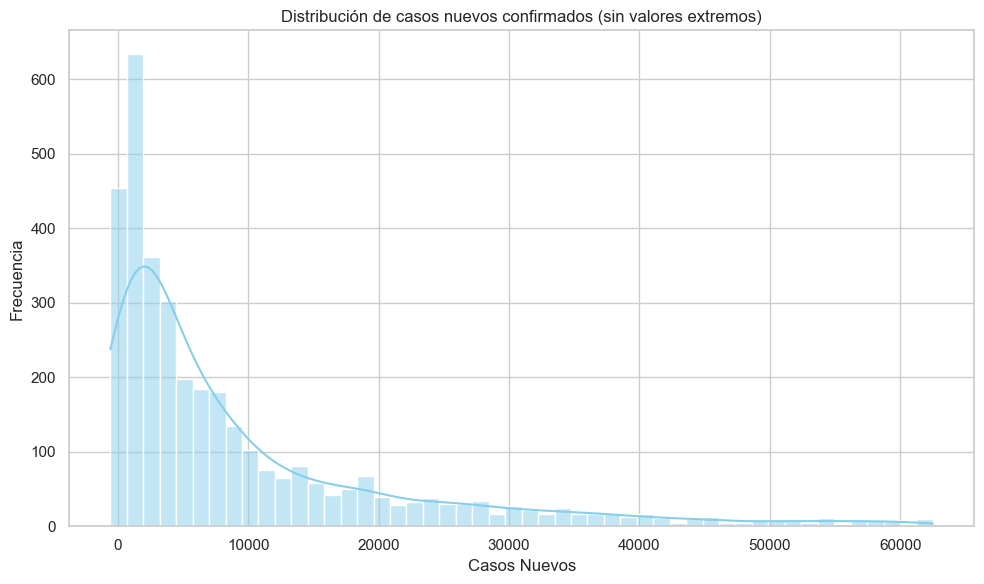

In [17]:
# Crear histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, x='new_confirmed', bins=50, kde=True, color='skyblue')
plt.title("Distribución de casos nuevos confirmados (sin valores extremos)")
plt.xlabel("Casos Nuevos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

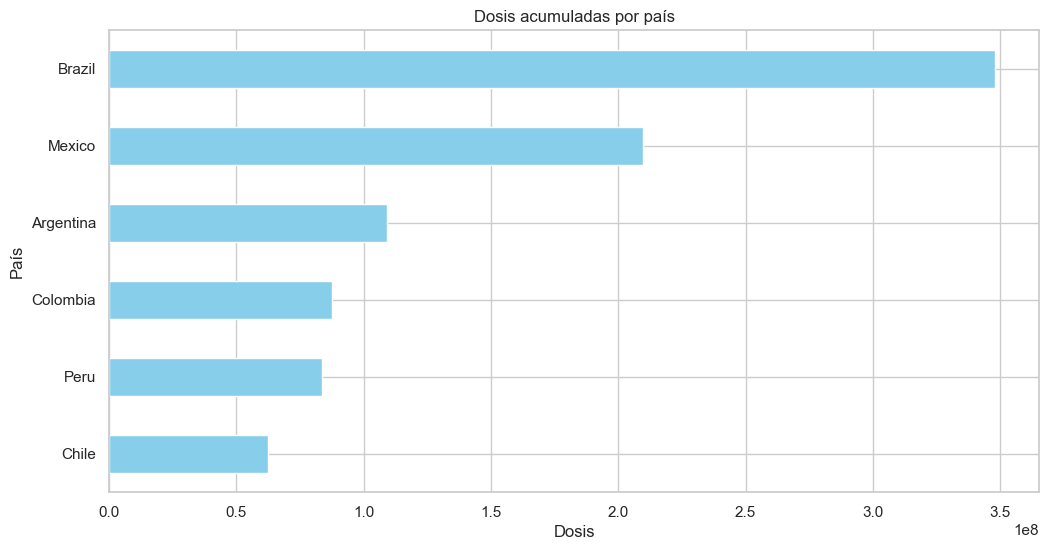

In [18]:
#Este gráfico muestra qué país ha administrado más vacunas. Brasil lidera, lo que indica una buena capacidad logística en salud.
vacunas_pais = df_pais_principal.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values()
vacunas_pais.plot(kind='barh', color='skyblue')
plt.title("Dosis acumuladas por país")
plt.xlabel("Dosis")
plt.ylabel("País")
plt.show()

In [19]:
# Heatmap de correlaciones
# Seleccionamos sólo las columnas numéricas que nos interesan:
columnas_num = [
  'new_confirmed', 'new_deceased', 
  'cumulative_confirmed', 'cumulative_deceased',
  'cumulative_vaccine_doses_administered',
  'population_density', 'gdp_per_capita_usd',
  'population_age_60_69', 'population_age_80_and_older'
]

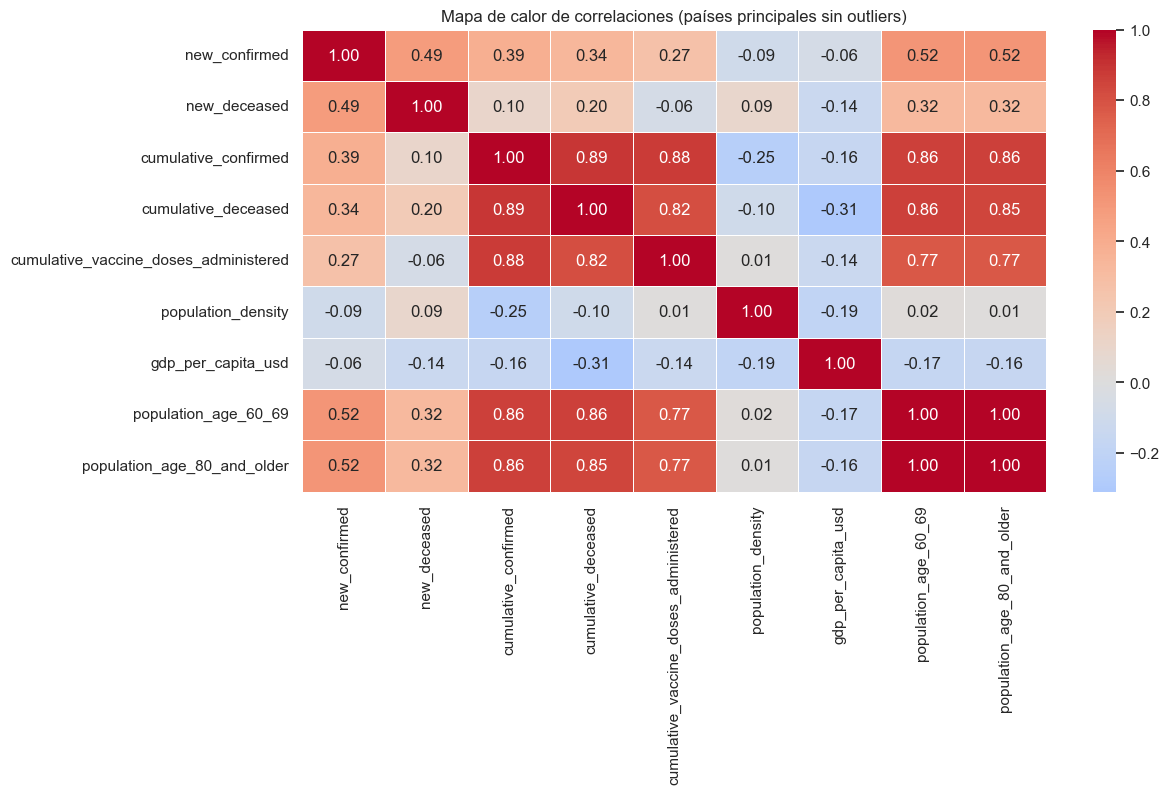

In [20]:
# Mapa de calor de correlaciones
# Asegurarnos de quedarnos sólo con las que existan:
columnas_existentes = [c for c in columnas_num if c in df_filtrado.columns]
correlacion = df_filtrado[columnas_existentes].corr().round(2)

sns.heatmap(
    correlacion,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Mapa de calor de correlaciones (países principales sin outliers)")
plt.show()


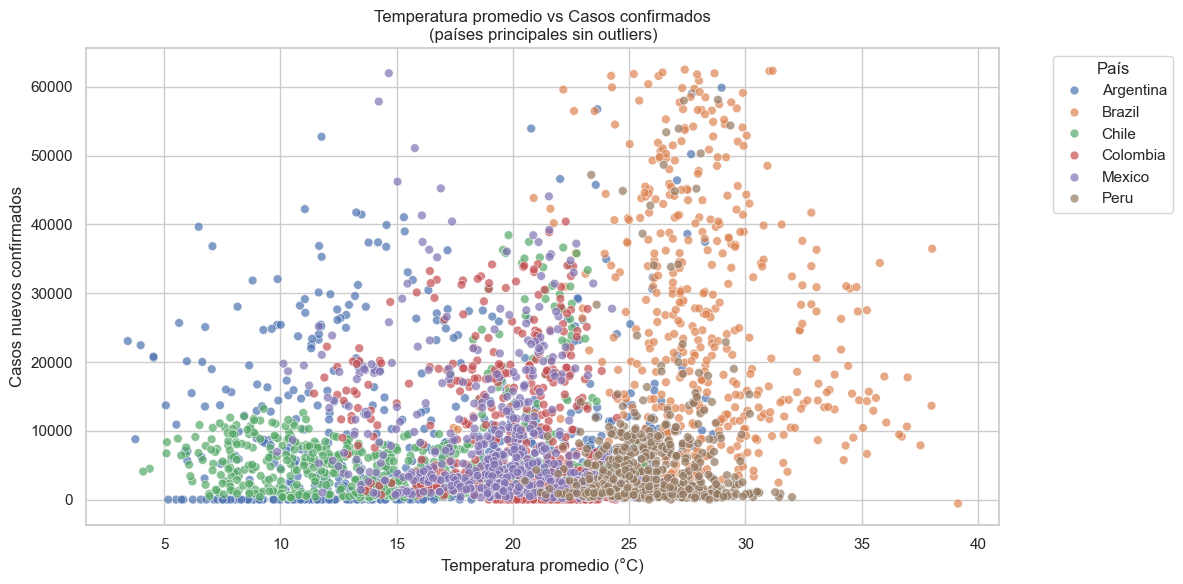

In [21]:
# Scatter: temperatura media vs casos nuevos
sns.scatterplot(
    data=df_filtrado,
    x='average_temperature_celsius',
    y='new_confirmed',
    hue='country_name',
    alpha=0.7,
    s=40
)
plt.title("Temperatura promedio vs Casos confirmados\n(países principales sin outliers)")
plt.xlabel("Temperatura promedio (°C)")
plt.ylabel("Casos nuevos confirmados")
plt.legend(title="País", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

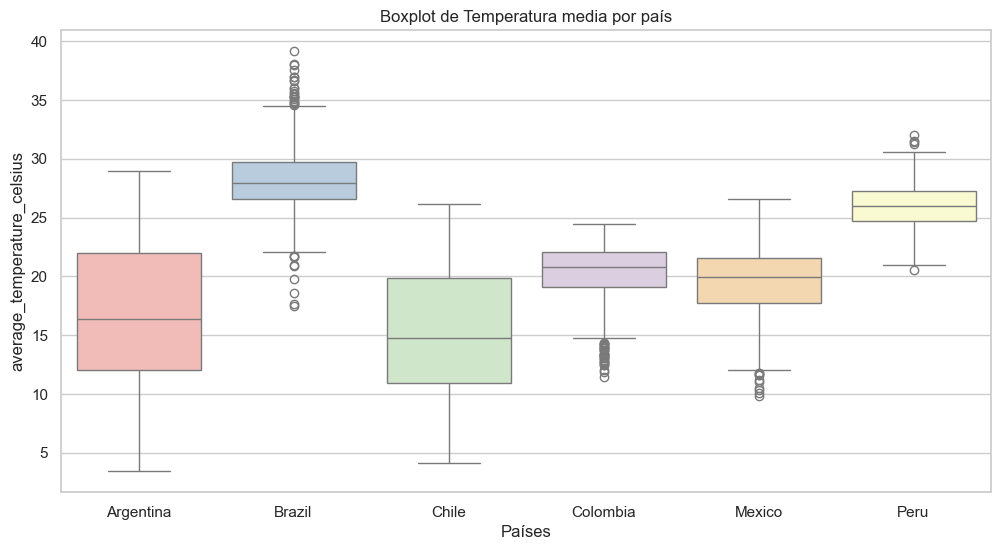

In [22]:
# Boxplot: temperatura por país
sns.boxplot(data=df_filtrado, x='country_name', y='average_temperature_celsius', hue='country_name', palette="Pastel1", legend=False)
plt.title ("Boxplot de Temperatura media por país")
plt.xlabel ("Países")
plt.show()

/var/folders/d2/4g3r27md2v3f7g6hx21p_t5w0000gn/T/ipykernel_57025/58839209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['month1'] = df_filtrado['date'].dt.to_period('M')


<function matplotlib.pyplot.show(close=None, block=None)>

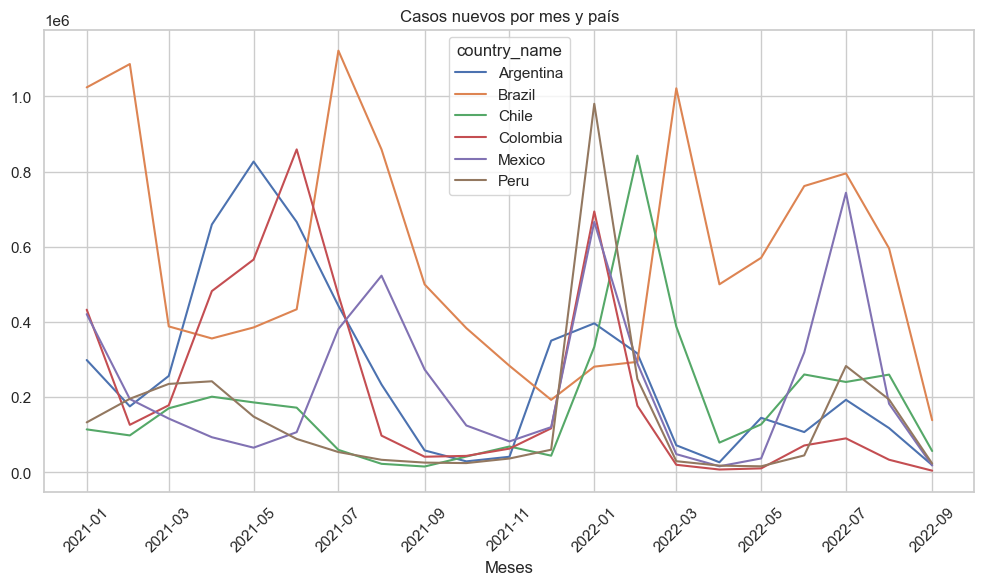

In [23]:
# Evaluación mensual de casos por país
df_filtrado['month1'] = df_filtrado['date'].dt.to_period('M')
casos_mensuales = df_filtrado.groupby(['country_name', 'month1'])['new_confirmed'].sum().reset_index()

# Convertmos el periodo a timestamp
casos_mensuales['month1'] = casos_mensuales['month1'].dt.to_timestamp()

sns.lineplot(data=casos_mensuales, x='month1', y='new_confirmed', hue='country_name')
plt.title("Casos nuevos por mes y país")
plt.ylabel("")
plt.xlabel ("Meses")
plt.xticks(rotation=45)
plt.show

## Avance 3 - Análisis Exploratorio Avanzado con Pandas y Numpy

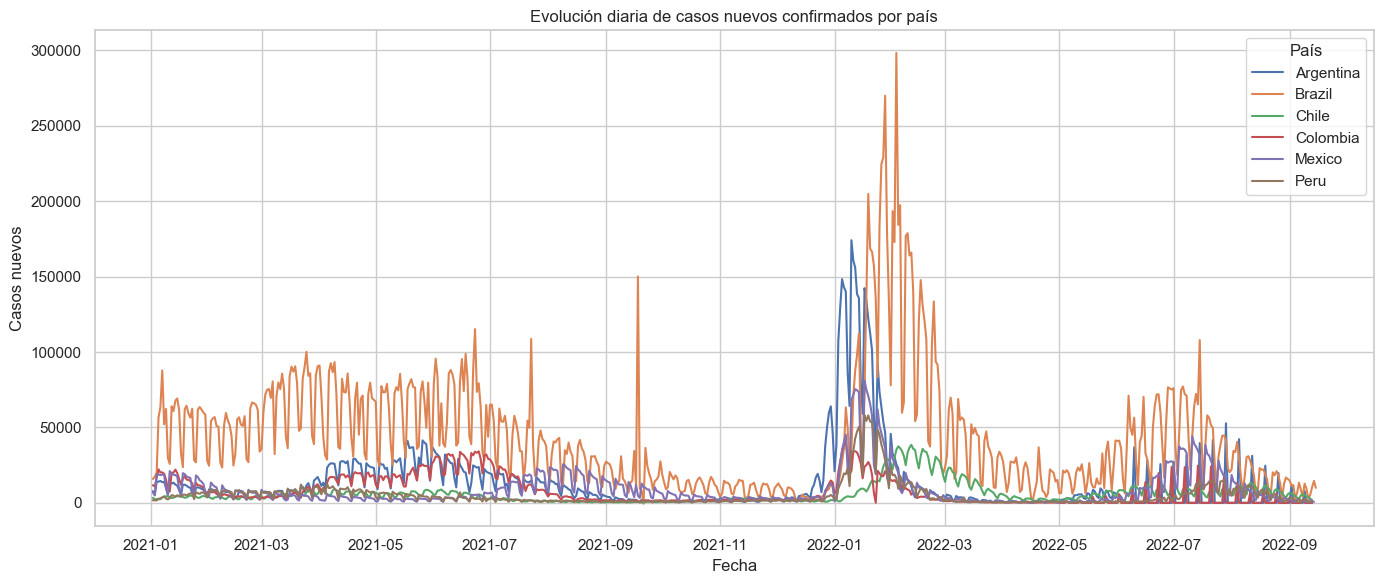

In [24]:
# Tendencia temporal de casos nuevos por país
plt.figure(figsize=(14,6))
sns.lineplot(data=df_pais_principal, x='date', y='new_confirmed', hue='country_name')
plt.title('Evolución diaria de casos nuevos confirmados por país')
plt.xlabel('Fecha')
plt.ylabel('Casos nuevos')
plt.legend(title='País')
plt.grid(True)
plt.tight_layout()
plt.show()

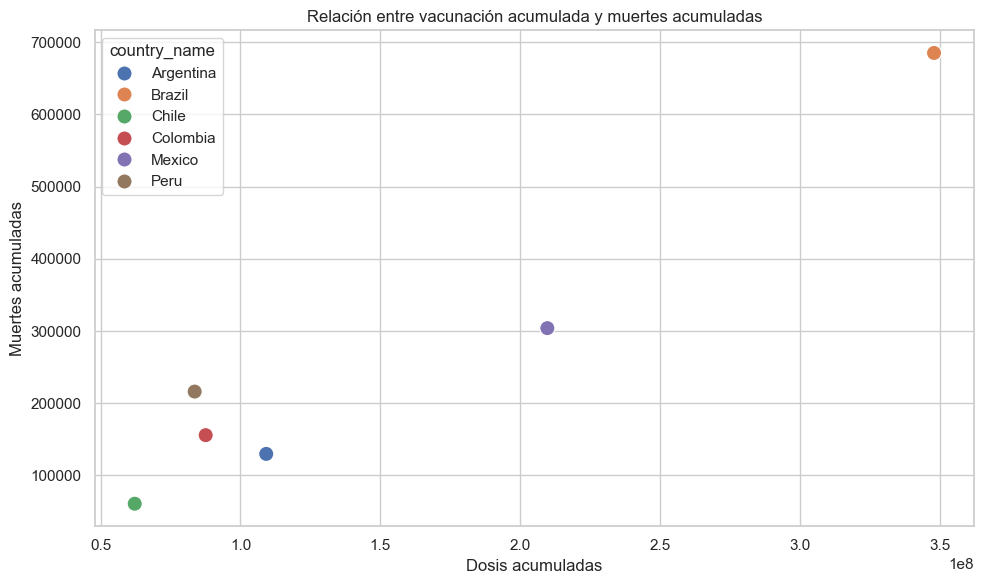

In [25]:
# Cálculo del valor máximo por país
df_max = df_pais_principal.groupby('country_name')[['cumulative_deceased', 'cumulative_vaccine_doses_administered']].max().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_max, x='cumulative_vaccine_doses_administered', y='cumulative_deceased', hue='country_name', s=120)
plt.title('Relación entre vacunación acumulada y muertes acumuladas')
plt.xlabel('Dosis acumuladas')
plt.ylabel('Muertes acumuladas')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/d2/4g3r27md2v3f7g6hx21p_t5w0000gn/T/ipykernel_57025/2283803312.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtrado, x='country_name', y='cumulative_vaccine_doses_administered', palette='pastel')


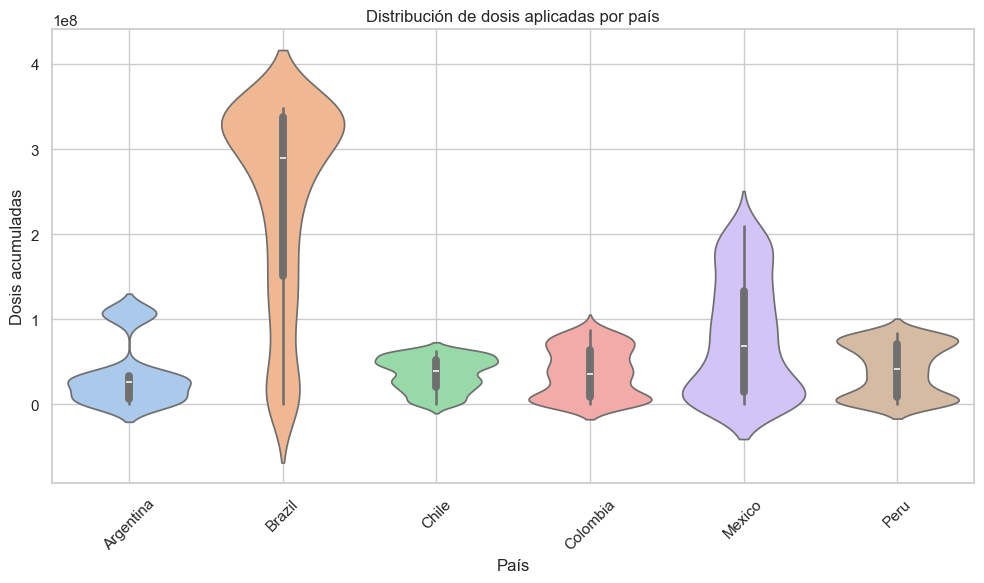

In [26]:
# Muestra cómo varían las dosis administradas en cada país. Brasil tiene la mayor concentración y amplitud, indicando un alto volumen y variabilidad
plt.figure(figsize=(10, 6))

sns.violinplot(data=df_filtrado, x='country_name', y='cumulative_vaccine_doses_administered', palette='pastel')
plt.title("Distribución de dosis aplicadas por país")
plt.xlabel("País")
plt.ylabel("Dosis acumuladas")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

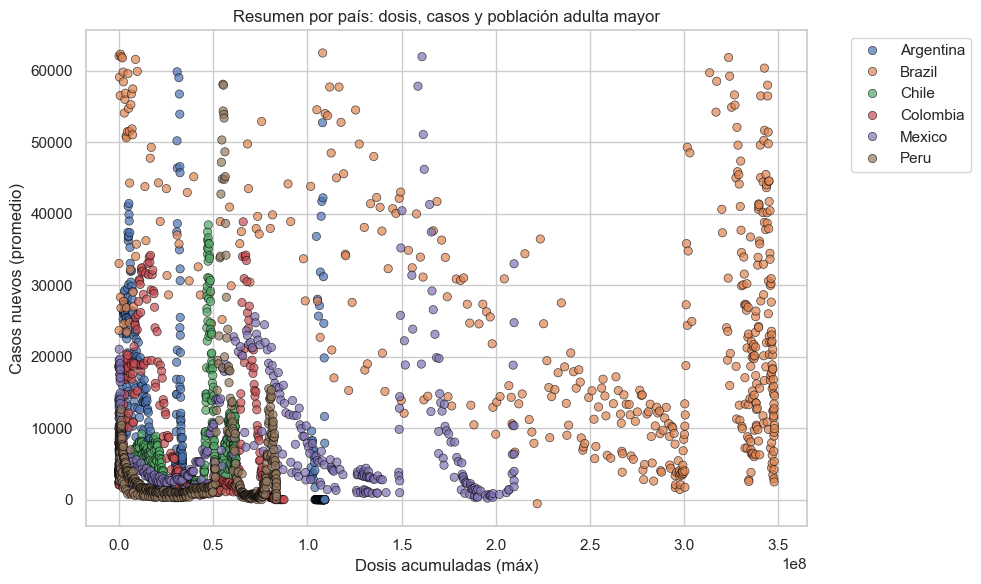

In [27]:
# Cada punto representa un país en un momento determinado. Se comparan las dosis administradas (eje X), casos nuevos (eje Y) y el tamaño del punto representa la población adulta mayor. Brasil destaca por tener mayor dispersión y volumen.
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_filtrado,
    x='cumulative_vaccine_doses_administered',
    y='new_confirmed',
    hue='country_name',
    sizes=(300, 1000),
    alpha=0.7,
    edgecolor='black'
)

plt.title("Resumen por país: dosis, casos y población adulta mayor")
plt.xlabel("Dosis acumuladas (máx)")
plt.ylabel("Casos nuevos (promedio)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Visualización geográfica de la distribución de vacunas en Sudamérica. El color azul más intenso representa mayor número de dosis acumuladas. Brasil resalta como el país con mayor cobertura
import plotly.express as px
import pandas as pd

# Filtrar los países principales
paises_principales = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']

# Agrupar por país y obtener el valor máximo de dosis acumuladas
df_mapa = df_pais_principal[df_pais_principal['country_name'].isin(paises_principales)]
dosis_por_pais = df_mapa.groupby('country_name', as_index=False)['cumulative_vaccine_doses_administered'].max()

# Crear mapa
fig = px.choropleth(
    dosis_por_pais,
    locations="country_name",
    locationmode="country names",
    color="cumulative_vaccine_doses_administered",
    color_continuous_scale="Blues",
    title="Mapa de dosis acumuladas administradas por país"
)

fig.update_layout(
    geo_scope='south america', 
    title_x=0.5,
    coloraxis_colorbar=dict(
    title="Dosis acumuladas"))

fig.show()